# Improved Generator for Face Animals

Dataset: https://www.kaggle.com/datasets/andrewmvd/animal-faces

In [8]:
import torch
from torch import nn
from torchvision import datasets

from pathlib import Path

data_path = Path("afhq")

train_dir = data_path / "train"

In [27]:
import data_loader

dataloader = data_loader.load_data(train_dir, 32)

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [34]:
from models import Generator, Discriminator
import new_flow

img_list, G_losses, D_losses = new_flow.train(dataloader, 10, 0.0002, device)


[0/10][0/458]	Loss_D: 2.0365	Loss_G: 5.7884	D(x): 0.4389	D(G(z)): 0.5615 / 0.0038
[0/10][50/458]	Loss_D: 0.0514	Loss_G: 7.3984	D(x): 0.9565	D(G(z)): 0.0026 / 0.0011
[0/10][100/458]	Loss_D: 0.7225	Loss_G: 7.4522	D(x): 0.8929	D(G(z)): 0.3057 / 0.0024
[0/10][150/458]	Loss_D: 0.4406	Loss_G: 5.0083	D(x): 0.8762	D(G(z)): 0.1957 / 0.0152
[0/10][200/458]	Loss_D: 0.6984	Loss_G: 8.5055	D(x): 0.8824	D(G(z)): 0.3470 / 0.0003
[0/10][250/458]	Loss_D: 0.4727	Loss_G: 7.4032	D(x): 0.9072	D(G(z)): 0.2309 / 0.0010
[0/10][300/458]	Loss_D: 0.1114	Loss_G: 5.6906	D(x): 0.9473	D(G(z)): 0.0384 / 0.0054
[0/10][350/458]	Loss_D: 0.8597	Loss_G: 2.7869	D(x): 0.6534	D(G(z)): 0.1720 / 0.1455
[0/10][400/458]	Loss_D: 0.6312	Loss_G: 5.5544	D(x): 0.9360	D(G(z)): 0.3733 / 0.0061
[0/10][450/458]	Loss_D: 0.3771	Loss_G: 4.7622	D(x): 0.8782	D(G(z)): 0.1834 / 0.0130
[1/10][0/458]	Loss_D: 0.5324	Loss_G: 6.8491	D(x): 0.9302	D(G(z)): 0.3326 / 0.0017
[1/10][50/458]	Loss_D: 1.5096	Loss_G: 5.1583	D(x): 0.9378	D(G(z)): 0.5975 / 0.019

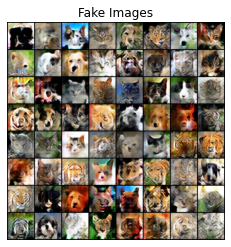

In [36]:
import matplotlib.pyplot as plt
import torchvision.utils

plt.axis("off")
plt.title("Fake Images")
plt.imshow(torch.permute(img_list[-1],(1,2,0)))
plt.show()

In [37]:
from torchvision.utils import save_image

i=0

for img in img_list:
  save_image(img, f"anim{i}.png")
  i+=1